## Movie Reviews Classification
### Binary Classification using IMDB Dataset

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

The argument `num_words = 10000` means that we will only keep the top 10,000 most frequently occurring words in the training data.

The variables `train_data` and `test_data` are list of reviews, each review being a list of word indices.

`train_labels` and `test_labels` are lists of 0s(negative) and 1s(positive).

#### Decoding review back to english words

In [7]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data

We need to turn the lists into tensors. There are 2 ways to do this:
- Pad our lists so they all have the same length, and turn them into an integer tensor of shape `(samples, word_indices)`, then use as first layer in our network a layer capable of handling such integer tensors.
- One-hot-encode our lists to turn them into vectors of 0s and 1s, then we could use as first layer in our network a Dense layer, capable of handling floating point vector data.

We will go with the second approach by vecotrizing the data.

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    # create all-0 matrix
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

# vectorized training data
x_train = vectorize_sequences(train_data)

#vectorize test data
x_test = vectorize_sequences(test_data)

x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

#### Vectorizing labels

In [10]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Building the network

#### Network Architecture

- 2 immediate layers with 16 hidden units each
- Third layer will output the scalar prediction regarding the sentiment of the current review.
- The intermediate layers will use `relu` as the 'activation function'.
- The final layer will use a `sigmoid activation` function to output the probability.

In [12]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [15]:
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [17]:
# passing custom loss function or metrics
from keras import losses, optimizers, metrics

model.compile(optimizer = optimizers.RMSprop(learning_rate = 0.001),
             loss = losses.binary_crossentropy,
             metrics = [metrics.binary_accuracy])

### Validating our approach

To monitor the accuracy of the model during training on the data it has never seen before, we create a `validation set` by setting apart 10,000 samples from the original training data:

In [18]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Now train our model for 20 epochs, in mini-batches of 512 samples.

We will also monitor loss and accuracy on the 10,000 samples we set apart. This is done by passing the validation data as the `validation_data` argument.

In [19]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20



30/30 [==============================] - 10s 209ms/step - loss: 0.4998 - binary_accuracy: 0.7931 - val_loss: 0.3801 - val_binary_accuracy: 0.8670
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3092 - binary_accuracy: 0.8977 - val_loss: 0.3313 - val_binary_accuracy: 0.8687
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2330 - binary_accuracy: 0.9223 - val_loss: 0.3166 - val_binary_accuracy: 0.8686
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1910 - binary_accuracy: 0.9362 - val_loss: 0.2886 - val_binary_accuracy: 0.8841
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1571 - binary_accuracy: 0.9491 - val_loss: 0.3592 - val_binary_accuracy: 0.8574
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1348 - binary_accuracy: 0.9571 - val_loss: 0.3452 - val_binary_accuracy: 0.8690
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1174

The `model.fit()` returns a `History` object. This object has a member `history`, which is a dictionary containing data about everything that happened during training.

In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

Now we use Matplotlib to plot the training and validation loss, as well as the training and validation accuracy

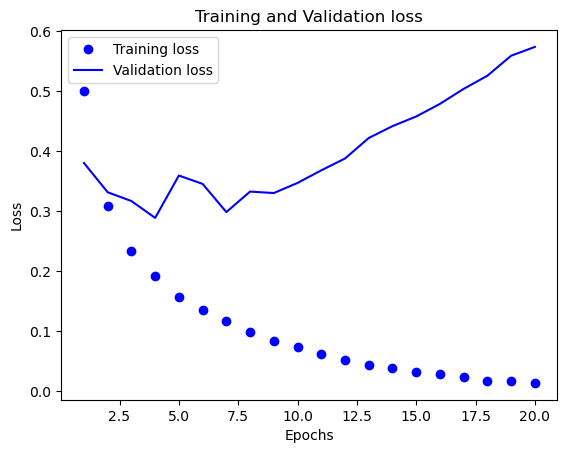

In [29]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

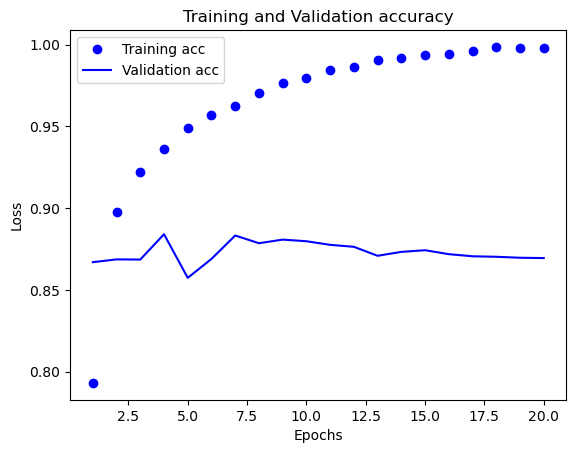

In [31]:
plt.clf() # clear figure

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### Observation
- The training loss decreases with every epoch
- The training accuracy increases with every epoch. 
> When running gradient descent optimization, the quantity you are trying to minimize should get lower with every iteration.
- After the second epoch, we are over-optimizing on the training data, and we end up learning representations that are specific to the training data and do not generalize to data outside of the training set.

To prevent overfitting, we could stop after three epochs.

### Training new network for less number of epochs

In [32]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 15ms/step - loss: 0.5116 - accuracy: 0.8038
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.3112 - accuracy: 0.8969
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2379 - accuracy: 0.9171
Epoch 4/4
782/782 [==============================] - 5s 5ms/step - loss: 0.2888 - accuracy: 0.8829


In [33]:
results


[0.28878524899482727, 0.8829200267791748]

The naive approach achieves an accuracy of 88%.

In [34]:
model.predict(x_test)

782/782 [==============================] - 7s 7ms/step


array([[0.19471371],
       [0.99822867],
       [0.67795724],
       ...,
       [0.07913737],
       [0.06661819],
       [0.4956097 ]], dtype=float32)